# Exact Diagonalization (ED)

## Transverse-Field Ising Model (TFIM)

### References:
* J. Stat. Mech. (2017) P093101.
* Α α, Β β, Γ γ, Δ δ, Ε ε, Ζ ζ, Η η, Θ θ, Ι ι, Κ κ, Λ λ, Μ μ, Ν ν, Ξ ξ, Ο ο, Π π, Ρ ρ, Σ σ/ς, Τ τ, Υ υ, Φ φ, Χ χ, Ψ ψ, and Ω ω.

Consider 1D ferromagnetic (FM) transverse-field Ising model (TFIM) with periodic boundary condition (PBC)

$$
  H = -J \sum_{i=1}^N S^x_i S^x_{i+1} - h \sum_{i=1}^N S^z_i,
$$

where $\vec{S}=\frac{1}{2}\vec{\sigma}$ and the spin operators and $\sigma$ are the Pauli matrices. $N$ is the number of sites.
We require $J>0$ to ensure the system is ferromagnetic. There is a quantum phase transition at $h/J=1.0$.

Define

$$
  E_k \equiv \sqrt{ (J/2)^2 + h^2 + Jh\cos(k).
  }
$$

$$
  \Lambda_a \equiv \left\{
    \pm \frac{\pi}{N}, \pm \frac{3\pi}{N}, \cdots, \pm \frac{(N-1)\pi}{N}
  \right\}.
$$

$$
  \Lambda_p \equiv \left\{
    0, \pm \frac{2\pi}{N}, \pm \frac{4\pi}{N}, \cdots, \pm \frac{(N-2)\pi}{N}, \pi
  \right\}.
$$

The ground state energy $E_0$ and first excited state energy $E_1$ are:

$$
  E_0 = -\frac{1}{2}\sum_{k \in \Lambda_a} E_k
$$

$$
  E_1 = - \frac{J}{2} -\frac{1}{2}\sum_{k \in \Lambda_p, k \notin \{0, \pi\}} E_k ,
$$

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import *
from scipy.sparse.linalg import *
import pandas as pd

hc = 0.5

## Problem 1: Pauli matrices and spin operators

Create the numpy arrays for
* Pauli matrices $\sigma_x, \sigma_y, \sigma_z$,
* $S=1/2$ spin operators $S_x, S_y, S_z$,

and print them.

In [27]:
J = 1

# σx = np.array([[0,1],
#               [1,0]])

# σy = np.array([[0,-1j],
#               [1j,0]])

# σz = np.array([[1,0],
#               [0,-1]])

row  = np.array([0, 1])
col  = np.array([1, 0])
data = np.array([1,1])
σx = csr_matrix((data, (row, col)), shape=(2, 2))

row  = np.array([0, 1])
col  = np.array([1, 0])
data = np.array([-1j,1j])
σy = csr_matrix((data, (row, col)), shape=(2, 2))

row  = np.array([0, 1])
col  = np.array([0, 1])
data = np.array([1,-1])
σz = csr_matrix((data, (row, col)), shape=(2, 2))

print(type(σx))
print(type(σy))
print(type(σz))
print('\nσx = \n', σx.toarray())
print('\nσy = \n', σy.toarray())
print('\nσz = \n', σz.toarray())

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>

σx = 
 [[0 1]
 [1 0]]

σy = 
 [[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

σz = 
 [[ 1  0]
 [ 0 -1]]


In [28]:
Sx = 1/2*σx
Sy = 1/2*σy
Sz = 1/2*σz

row  = np.array([0, 1])
col  = np.array([0, 1])
data = np.array([1,1])
I = csr_matrix((data, (row, col)), shape=(2, 2))
print(type(I))

print('\nSx = \n', Sx.toarray())
print('\nSy = \n', Sy.toarray())
print('\nSz = \n', Sz.toarray())
print('\nI = \n', I.toarray())

<class 'scipy.sparse.csr.csr_matrix'>

Sx = 
 [[0.  0.5]
 [0.5 0. ]]

Sy = 
 [[0.+0.j  0.-0.5j]
 [0.+0.5j 0.+0.j ]]

Sz = 
 [[ 0.5  0. ]
 [ 0.  -0.5]]

I = 
 [[1 0]
 [0 1]]


check $ [S^x, S^y] = i\epsilon_{ijk} S_k$

In [29]:
print((Sx @ Sy - Sy @ Sx).toarray())
print((1j*Sz).toarray())

[[0.+0.5j 0.+0.j ]
 [0.+0.j  0.-0.5j]]
[[0.+0.5j 0.+0.j ]
 [0.+0.j  0.-0.5j]]


Get the eigenstates of $S_z$ operator $|+>, |->$

In [30]:
Y,Z = np.linalg.eigh(Sz.toarray())
print('Y = \n', Y)
print('Z = \n', Z)

v0 = Z[:,0]; v1 = Z[:,1]

print('Sz @ v0 - Y[0] * v0 = ', Sz @ v0 - Y[0] * v0)
print('Sz @ v1 - Y[1] * v1 = ', Sz @ v1 - Y[1] * v1)

Y = 
 [-0.5  0.5]
Z = 
 [[0. 1.]
 [1. 0.]]
Sz @ v0 - Y[0] * v0 =  [0. 0.]
Sz @ v1 - Y[1] * v1 =  [0. 0.]


Check the expectation values:\
$<+|S^x|+>$, $<+|S^x|->$, $<-|S^x|+>$, $<-|S^x|->$\
$<+|S^y|+>$, $<+|S^y|->$, $<-|S^y|+>$, $<-|S^y|->$\
$<+|S^z|+>$, $<+|S^z|->$, $<-|S^z|+>$, $<-|S^z|->$

In [31]:
p = np.array([1,0]) # |+> state
m = np.array([0,1]) # |-> state

two_states = [(p,p),(p,m),(m,p),(m,m)]

print('Sx expectation:')
for state1, state2 in two_states:
    print(state1 @ Sx @ state2)

print('-'*15)
print('Sy expectation:')
for state1, state2 in two_states:
    print(state1 @ Sy @ state2)

print('-'*15)
print('Sz expectation:')
for state1, state2 in two_states:
    print(state1 @ Sz @ state2)

Sx expectation:
0.0
0.5
0.5
0.0
---------------
Sy expectation:
0j
-0.5j
0.5j
0j
---------------
Sz expectation:
0.5
0.0
0.0
-0.5


Check $(\hat{A_1} \otimes \hat{A_2}) |\alpha>_1 |\alpha>_2 = (\hat{A_1} |\alpha>_1) \otimes (\hat{A_2}  |\alpha>_2) = |\alpha^\prime>_1 \otimes |\alpha^\prime>_2$

L.H.S. = $(\hat{A_1} \otimes \hat{A_2}) |\alpha>_1 |\alpha>_2$\
R.H.S. = $(\hat{A_1} |\alpha>_1) \otimes (\hat{A_2}  |\alpha>_2) = |\alpha^\prime>_1 \otimes |\alpha^\prime>_2$

In [32]:
d = 4
A1 = np.random.random((d,d))
A2 = np.random.random((d,d))
alpha_1 = np.random.random((d,))
alpha_2 = np.random.random((d,))

y1 = (np.kron(A1,A2) @ np.kron(alpha_1,alpha_2))
print(y1)

alpha_1_prime = A1 @ alpha_1
alpha_2_prime = A2 @ alpha_2

y2 = np.kron(alpha_1_prime, alpha_2_prime)
print(y2)

print(np.allclose(y1,y2))

[0.11051275 0.3779709  0.46877723 0.25342618 0.11408364 0.39018389
 0.48392437 0.26161489 0.11019354 0.37687914 0.46742318 0.25269417
 0.07164981 0.24505356 0.30392691 0.16430627]
[0.11051275 0.3779709  0.46877723 0.25342618 0.11408364 0.39018389
 0.48392437 0.26161489 0.11019354 0.37687914 0.46742318 0.25269417
 0.07164981 0.24505356 0.30392691 0.16430627]
True


## Problem 2: Two-site operators 

Use matrix Kronecker (direct) product to create the numpy arrays for
* $I_1 \otimes I_2$,
* $Sz_1 \otimes S_z2$,
* $Sx_1 \otimes I_2$, $I_1 \otimes Sx_2$,

and print them.

In [33]:
I1_I2   = kron(I,I, format='csr')
Sz1_Sz2 = kron(Sz,Sz, format='csr')
Sx1_I2  = kron(Sx,I, format='csr')
I1_Sx2  = kron(I,Sx, format='csr')

print(type(I1_I2))
print(type(Sz1_Sz2))
print(type(Sx1_I2))
print(type(I1_Sx2))
print('\nI1_I2 = \n',I1_I2.toarray())
print('\nSz1_Sz2 = \n',Sz1_Sz2.toarray())
print('\nSx1_I2 = \n',Sx1_I2.toarray())
print('\nI1_Sx2 = \n',I1_Sx2.toarray())

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>

I1_I2 = 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

Sz1_Sz2 = 
 [[ 0.25  0.    0.    0.  ]
 [ 0.   -0.25  0.    0.  ]
 [ 0.    0.   -0.25  0.  ]
 [ 0.    0.    0.    0.25]]

Sx1_I2 = 
 [[0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]
 [0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]]

I1_Sx2 = 
 [[0.  0.5 0.  0. ]
 [0.5 0.  0.  0. ]
 [0.  0.  0.  0.5]
 [0.  0.  0.5 0. ]]


## Problem 3: Four-site operators

Create the numpy arrays for the 4-site operators
* $H_Z \equiv Sz_1+Sz_2+Sz_3+Sz_4$,
* $H_{XX, OBC} \equiv Sx_1 Sx_2 + Sx_2 Sx_3 + Sx_3 Sx_4$,
* $H_{XX, PBC} \equiv Sx_1 Sx_2 + Sx_2 Sx_3 + Sx_3 Sx_4 + Sx_1 Sx_4$,

and print them.

**Hint**: You can use something like `np.printoptions(precision=3, linewidth=100)` to control the precision and the linewidth of the output.

In [34]:
Hx = kron(kron(kron(Sx,I),I),I)\
    +kron(kron(kron(I,Sx),I),I)\
    +kron(kron(kron(I,I),Sx),I)\
    +kron(kron(kron(I,I),I),Sx)

Hzz_OBC = kron(kron(kron(Sz,Sz),I),I)\
         +kron(kron(kron(I,Sz),Sz),I)\
         +kron(kron(kron(I,I),Sz),Sz)

Hzz_PBC = kron(kron(kron(Sz,Sz),I),I)\
         +kron(kron(kron(I,Sz),Sz),I)\
         +kron(kron(kron(I,I),Sz),Sz)\
         +kron(kron(kron(Sz,I),I),Sz)

J = 1
h = 0.5

with np.printoptions(precision=3, linewidth=100):
    for i,item in enumerate([Hx,Hzz_OBC,Hzz_PBC]):
        names = ['Hx', 'Hzz_OBC', 'Hzz_PBC']
        print('\n{} = '.format(names[i]))
        print(item.toarray())


Hx = 
[[0.  0.5 0.5 0.  0.5 0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.5 0.  0.5 0.  0.  0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.5 0.  0.  0.5 0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.5 0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.5 0.  0.  0.5 0.  0.  0.5 0.  0.  0.  0.  0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.5 0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0.5 0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0.  0.5 0.  0.  0.5 0.  0.  0.5 0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.5 0.  0.  0.  0.5 0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.5 0.  0.  0.5 0.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.5 0.  0.5 0

## Problem 5: $N$-site Hamiltonian and eigenvalues

* Write functions `H_ZZ(N)` and `H_X(N)` which return $\sum_{i=1}^N Sz_i Sz_{i+1}$ and $\sum_{i=1}^N Sx_i$ respectively for the case of PBC.
* For $J=1$, $h=1/2$, $N=4, 6, 8, 10, \dots$, print $E_0/N$, $E_1/N$, and $E_1-E_0$. What is the largest $N$ that you can reach?

In [35]:
def kron_all(list):
    '''
    A function to take tensor product for all matrix in a sequence list
    '''
    L = len(list)
    if L == 2:
        return kron(list[0], list[1], format='csr')
    else:
        return kron(list[0], kron_all(list[1:]), format='csr')

In [36]:
Op_list = [Sz,Sz,I,I]
Op_kron = kron_all(Op_list)

print(Op_kron.shape)
with np.printoptions(precision=3, linewidth=100):
    print(Op_kron.toarray())

(16, 16)
[[ 0.25  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.25  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.25  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.25  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.25  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.25  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.25  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   -0.25  0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.   -0.25  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.25  0.    0.    0.    0.    0.    0.  ]
 

In [37]:
S_operator = {'X': Sx,
              'Y': Sy,
              'Z': Sz}

def one_operator_sequences(name,L):
    '''
    A function produces a sequence list for single operator
    '''
    Op = S_operator[name]
    tot_sequence = []
    for i in range(L):
        sequence = [I for _ in range(L)]
        sequence[i] = Op
        tot_sequence.append(sequence)
    return tot_sequence

Z_list = one_operator_sequences('Z', L=3)
for item_list in Z_list:
    print('='*25)
    for item in item_list:
        print(item.toarray(), '\n' + '-'*15)

[[ 0.5  0. ]
 [ 0.  -0.5]] 
---------------
[[1 0]
 [0 1]] 
---------------
[[1 0]
 [0 1]] 
---------------
[[1 0]
 [0 1]] 
---------------
[[ 0.5  0. ]
 [ 0.  -0.5]] 
---------------
[[1 0]
 [0 1]] 
---------------
[[1 0]
 [0 1]] 
---------------
[[1 0]
 [0 1]] 
---------------
[[ 0.5  0. ]
 [ 0.  -0.5]] 
---------------


In [38]:
def two_operators_sequences(name,L,bc):
    '''
    A function produces a sequence list for two operators
    '''
    Op1 = S_operator[name[0]]
    Op2 = S_operator[name[1]]
    tot_sequence = []
    if bc == 'PBC' :
        for i in range(L):
            j = (i+1)%L
            sequence = [I for _ in range(L)]
            sequence[i] = Op1
            sequence[j] = Op2
            tot_sequence.append(sequence)

    if bc == 'OBC':
        for i in range(L-1):
            j = i+1
            sequence = [I for _ in range(L)]
            sequence[i] = Op1
            sequence[j] = Op2
            tot_sequence.append(sequence)

    return tot_sequence

XX_list = two_operators_sequences('XX',L=3,bc='PBC')
for item_list in XX_list:
    print('='*25)
    for item in item_list:
        print(item.toarray(), '\n' + '-'*15)

[[0.  0.5]
 [0.5 0. ]] 
---------------
[[0.  0.5]
 [0.5 0. ]] 
---------------
[[1 0]
 [0 1]] 
---------------
[[1 0]
 [0 1]] 
---------------
[[0.  0.5]
 [0.5 0. ]] 
---------------
[[0.  0.5]
 [0.5 0. ]] 
---------------
[[0.  0.5]
 [0.5 0. ]] 
---------------
[[1 0]
 [0 1]] 
---------------
[[0.  0.5]
 [0.5 0. ]] 
---------------


In [39]:
def all_H(L,bc):
    '''
    A function produces Hx,Hz,Hxx,Hzz that are used to construct the total Hamiltonian
    '''
    Hx_list  = one_operator_sequences('X',L)
    Hz_list  = one_operator_sequences('Z',L)
    Hxx_list = two_operators_sequences('XX',L,bc)
    Hzz_list = two_operators_sequences('ZZ',L,bc)

    for i in range(len(Hx_list)):
        if i == 0:
            Hx  = kron_all(Hx_list[i])
            Hz  = kron_all(Hz_list[i])
            Hxx = kron_all(Hxx_list[i])
            Hzz = kron_all(Hzz_list[i])
        else:
            Hx  = Hx  + kron_all(Hx_list[i])
            Hz  = Hz  + kron_all(Hz_list[i])
            Hxx = Hxx + kron_all(Hxx_list[i])
            Hzz = Hzz + kron_all(Hzz_list[i])
    return Hx,Hz,Hxx,Hzz

In [40]:
h = 1/2
L = 4
bc='PBC'

Hx,Hz,Hxx,Hzz = all_H(L,bc)

# spin interation in z-direction, external field in x-direction
# H_PBC = -J*Hzz + h*Hx 

# spin interation in x-direction, external field in z-direction
H_PBC = -J*Hxx + h*Hz 
eigValues, eigVectors = eigsh(H_PBC, k=2, which='SA')

print('eigenValues = ', eigValues)

v0 = eigVectors[:,0]
v1 = eigVectors[:,1]
Op = H_PBC

print(v0.conj().T @ Op @ v0)
print(v1.conj().T @ Op @ v1)

eigenValues =  [-1.30656296 -1.20710678]
-1.3065629648763768
-1.2071067811865475


In [41]:
for i in range(100):
    Hx,Hz,Hxx,Hzz = all_H(18,bc)

# Run Data (set bias = 1e-4)

In [42]:
hs = np.linspace(0,1,50+1)
Ls = np.arange(4,16+1,2)

num_collect = 10
Ei_s = np.zeros((num_collect, len(hs), len(Ls)))
Sx_s = np.zeros((len(hs), len(Ls)))
Sz_s = np.zeros((len(hs), len(Ls)))
m01_s = np.zeros((len(hs), len(Ls)))

bias = 1e-4
bc = 'PBC'

for ih,h in enumerate(hs):
    if ih % 10 == 0:
        print('h = {}'.format(h))
    for iL,L in enumerate(Ls):
        Hx,Hz,Hxx,Hzz = all_H(L,bc)
        H_PBC = -J*Hxx - h*Hz - bias*Hx
        Y, Z = eigsh(H_PBC, k=2, which='SA')
        
        if len(Y) < num_collect:
            a = np.ones((num_collect))*np.nan
            a[:len(Y)] = Y
            Ei_s[:,ih,iL] = a[:num_collect]
        else:    
            Ei_s[:,ih,iL] = Y[:num_collect]
            
        Sx_s[ih,iL] = Z[:,0].conj().T @ Hx @ Z[:,0]
        Sz_s[ih,iL] = Z[:,0].conj().T @ Hz @ Z[:,0]
        m01_s[ih,iL] = (Z[:,1].conj().T @ Hx @ Z[:,0] + Z[:,0].conj().T @ Hx @ Z[:,1]) / 2

h = 0.0
h = 0.2
h = 0.4
h = 0.6
h = 0.8
h = 1.0


Plot $E_i/L$

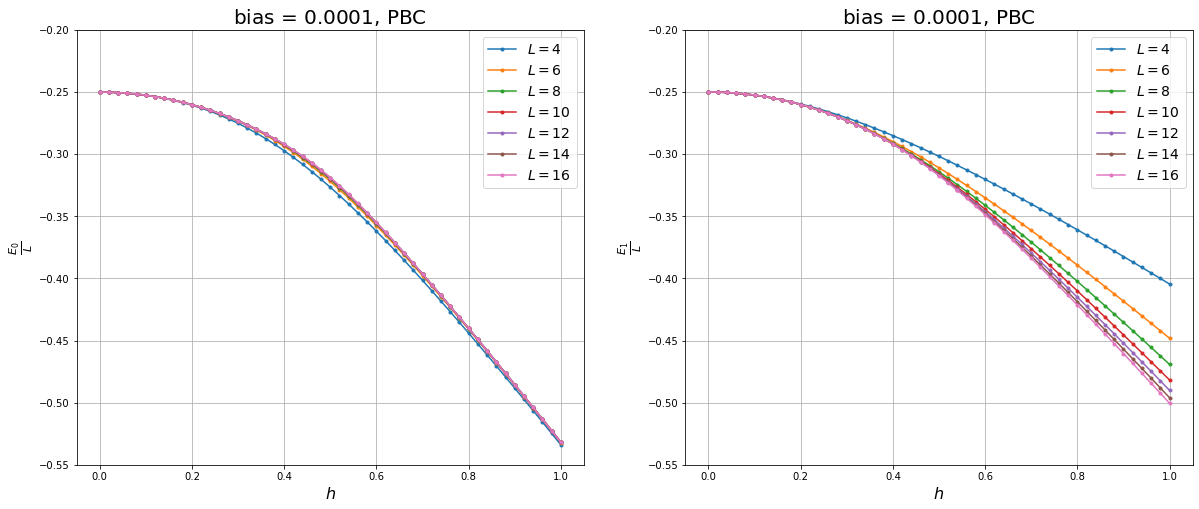

In [43]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
for iL,L in enumerate(Ls):
    plt.plot(hs, Ei_s[0,:,iL]/L, '.-', label=r'$L={}$'.format(L))
plt.legend(fontsize=14)
plt.xlabel(r'$h$', fontsize=16)
plt.ylabel(r'$\frac{E_0}{L}$', fontsize=16)
plt.title('bias = ${}$, {}'.format(bias,bc), fontsize=20)
plt.grid()
plt.ylim(-0.55,-0.2)

plt.subplot(1,2,2)
for iL,L in enumerate(Ls):
    plt.plot(hs, Ei_s[1,:,iL]/L, '.-', label=r'$L={}$'.format(L))
plt.legend(fontsize=14)
plt.xlabel(r'$h$', fontsize=16)
plt.ylabel(r'$\frac{E_1}{L}$', fontsize=16)
plt.title('bias = ${}$, {}'.format(bias,bc), fontsize=20)
plt.grid()
plt.ylim(-0.55,-0.2)

plt.show()

Plot ground state energy per site $E_0/L$ and its derivative

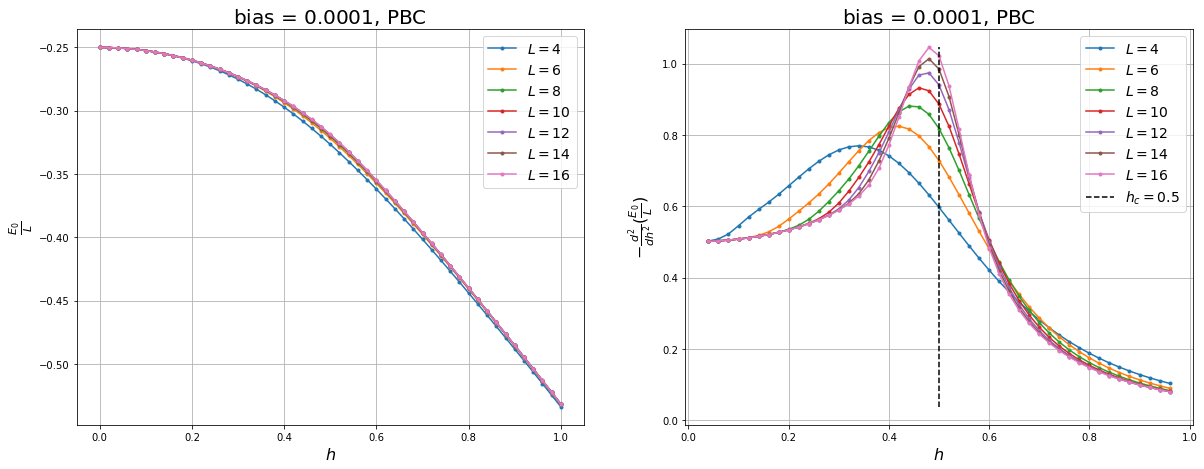

In [44]:
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
for iL,L in enumerate(Ls):
    plt.plot(hs, Ei_s[0,:,iL]/L, '.-', label=r'$L={}$'.format(L))
plt.legend(fontsize=14)
plt.xlabel(r'$h$', fontsize=16)
plt.ylabel(r'$\frac{E_0}{L}$', fontsize=16)
plt.title('bias = ${}$, {}'.format(bias,bc), fontsize=20)
plt.grid()

plt.subplot(2,2,2)
for iL,L in enumerate(Ls):
    x = hs
    y = np.gradient(Ei_s[0,:,iL]/L, hs)
    y2 = -np.gradient(y, hs)
    plt.plot(x[2:-2], y2[2:-2], '.-', label=r'$L={}$'.format(L))
plt.plot([hc,hc], [min(y2),max(y2)], 'k--', label=r'$h_c={}$'.format(hc))
plt.legend(fontsize=14)
plt.xlabel(r'$h$', fontsize=16)
plt.ylabel(r'$-\frac{d^2}{dh^2} (\frac{E_0}{L})$', fontsize=16)
plt.title('bias = ${}$, {}'.format(bias,bc), fontsize=20)
plt.grid()

plt.show()

Plot energy gap $E_1 - E_0$

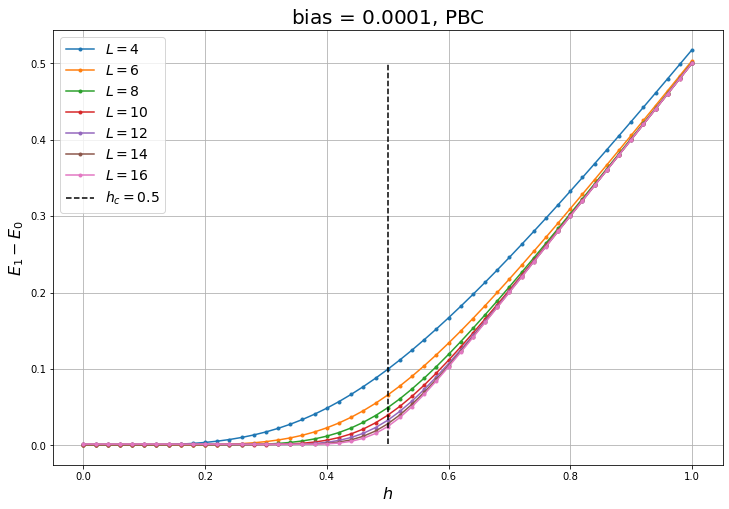

In [45]:
plt.figure(figsize=(12,8))
for iL,L in enumerate(Ls):
    E0 = Ei_s[0,:,iL]
    E1 = Ei_s[1,:,iL]
    x = hs
    y = E1 - E0
    plt.plot(x, y, '.-', label=r'$L={}$'.format(L))
plt.plot([hc,hc], [min(y),max(y)], 'k--', label=r'$h_c={}$'.format(hc))
plt.legend(fontsize=14)
plt.xlabel(r'$h$', fontsize=16)
plt.ylabel(r'$E_1 - E_0$', fontsize=16)
plt.title('bias = ${}$, {}'.format(bias,bc), fontsize=20)
plt.grid()

Plot $<S_x>$, $<S_z>$

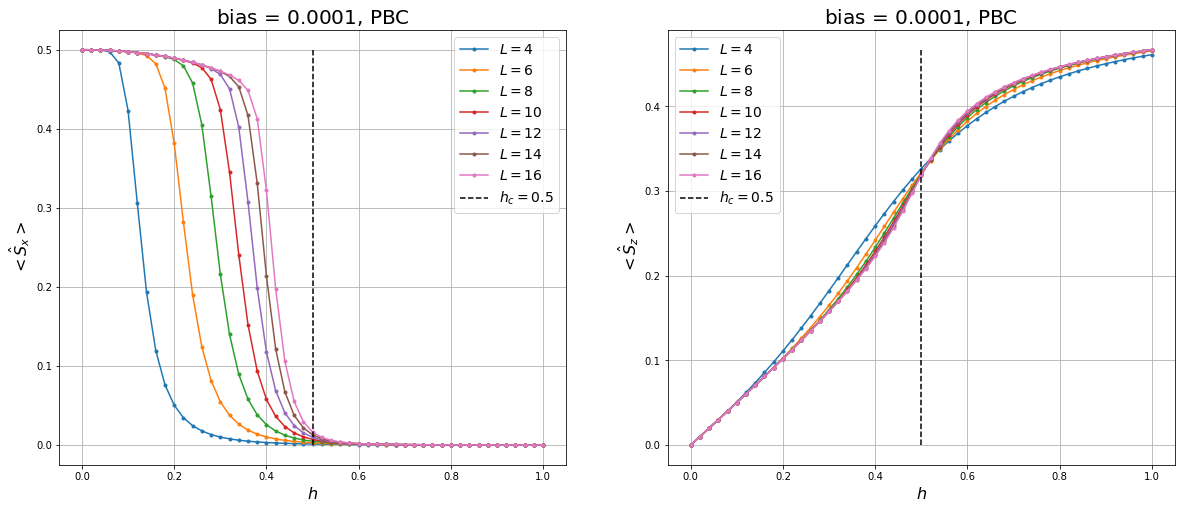

In [46]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
for iL,L in enumerate(Ls):
    x = hs
    y = Sx_s[:,iL]/L
    plt.plot(x, y, '.-', label=r'$L={}$'.format(L))
plt.plot([hc,hc], [min(y),max(y)], 'k--', label=r'$h_c={}$'.format(hc))
plt.legend(fontsize=14)
plt.xlabel(r'$h$', fontsize=16)
# plt.ylabel(r'$\frac{\sum_i<\lambda_0|\hat{S}^i_x|\lambda_0>}{L}$', fontsize=16)
plt.ylabel(r'$<\hat{S}_x>$', fontsize=16)
plt.title('bias = ${}$, {}'.format(bias,bc), fontsize=20)
plt.grid()

plt.subplot(1,2,2)
for iL,L in enumerate(Ls):
    x = hs
    y = Sz_s[:,iL]/L
    plt.plot(x, y, '.-', label=r'$L={}$'.format(L))
plt.plot([hc,hc], [min(y),max(y)], 'k--', label=r'$h_c={}$'.format(hc))
plt.legend(fontsize=14)
plt.xlabel(r'$h$', fontsize=16)
# plt.ylabel(r'$\frac{|\sum_i<\lambda_0|\hat{S}^i_z|\lambda_0>|}{L}$', fontsize=16)
plt.ylabel(r'$<\hat{S}_z>$', fontsize=16)
plt.title('bias = ${}$, {}'.format(bias,bc), fontsize=20)
plt.grid()

plt.show()

Plot $\frac{d}{dh}<\hat{S}_x>$, $\frac{d}{dh}<\hat{S}_z>$

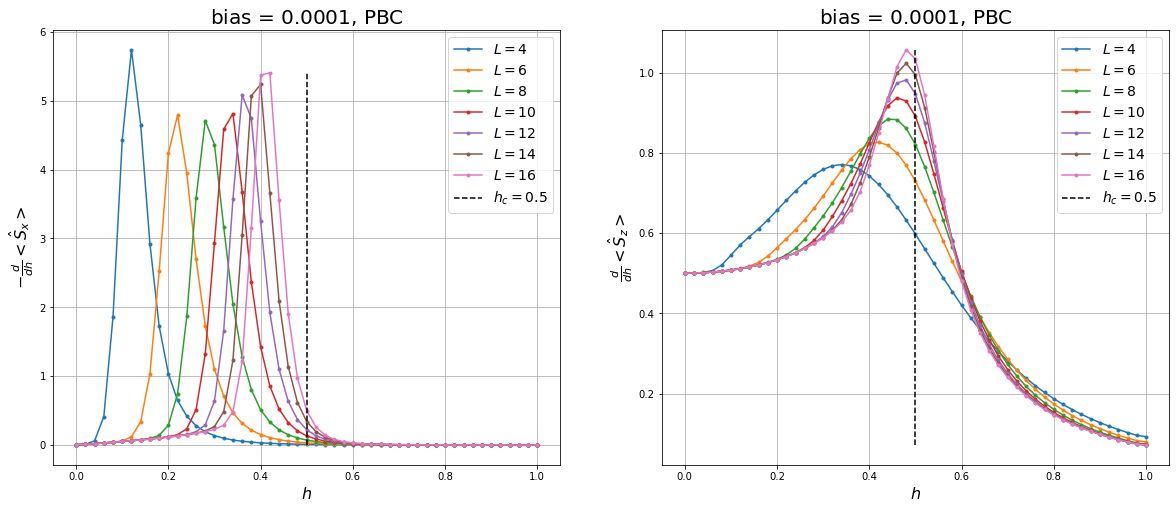

In [47]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
for iL,L in enumerate(Ls):
    x = hs
    y = -np.gradient(Sx_s[:,iL]/L, hs)
    plt.plot(x, y, '.-', label=r'$L={}$'.format(L))
plt.plot([hc,hc], [min(y),max(y)], 'k--', label=r'$h_c={}$'.format(hc))
plt.legend(fontsize=14)
plt.xlabel(r'$h$', fontsize=16)
# plt.ylabel(r'$\frac{\sum_i<\lambda_0|\hat{S}^i_x|\lambda_0>}{L}$', fontsize=16)
plt.ylabel(r'$-\frac{d}{dh}<\hat{S}_x>$', fontsize=16)
plt.title('bias = ${}$, {}'.format(bias,bc), fontsize=20)
plt.grid()

plt.subplot(1,2,2)
for iL,L in enumerate(Ls):
    x = hs
    y = np.gradient(Sz_s[:,iL]/L, hs)
    plt.plot(x, y, '.-', label=r'$L={}$'.format(L))
plt.plot([hc,hc], [min(y),max(y)], 'k--', label=r'$h_c={}$'.format(hc))
plt.legend(fontsize=14)
plt.xlabel(r'$h$', fontsize=16)
# plt.ylabel(r'$\frac{|\sum_i<\lambda_0|\hat{S}^i_z|\lambda_0>|}{L}$', fontsize=16)
plt.ylabel(r'$\frac{d}{dh}<\hat{S}_z>$', fontsize=16)
plt.title('bias = ${}$, {}'.format(bias,bc), fontsize=20)
plt.grid()

plt.show()

Run data with bias $= 0$

In [48]:
hs = np.linspace(0.1,1,50+1)
Ls = np.arange(4,16+1,2)

num_collect = 10
Ei_s = np.zeros((num_collect, len(hs), len(Ls)))
Sx_s = np.zeros((len(hs), len(Ls)))
Sz_s = np.zeros((len(hs), len(Ls)))
m01_s = np.zeros((len(hs), len(Ls)))

bias = 0
bc = 'PBC'

for ih,h in enumerate(hs):
    if ih % 10 == 0:
        print('h = {}'.format(h))
    for iL,L in enumerate(Ls):    
        Hx,Hz,Hxx,Hzz = all_H(L,bc)
        H_PBC = -J*Hxx - h*Hz - bias*Hx
        Y, Z = eigsh(H_PBC, k=2, which='SA')

        if len(Y) < num_collect:
            a = np.ones((num_collect))*np.nan
            a[:len(Y)] = Y
            Ei_s[:,ih,iL] = a[:num_collect]
        else:    
            Ei_s[:,ih,iL] = Y[:num_collect]

        Sx_s[ih,iL] = Z[:,0].conj().T @ Hx @ Z[:,0]
        Sz_s[ih,iL] = Z[:,0].conj().T @ Hz @ Z[:,0]
        m01_s[ih,iL] = (Z[:,1].conj().T @ Hx @ Z[:,0] + Z[:,0].conj().T @ Hx @ Z[:,1]) / 2

h = 0.1
h = 0.28
h = 0.4600000000000001
h = 0.64
h = 0.8200000000000001
h = 1.0


Plot $|<m_{01}>|$ and its derivative, where $<m_{01}> \equiv \frac{<\lambda_0|\hat{S}_x|\lambda_1> + <\lambda_1|\hat{S}_x|\lambda_0>}{2}$

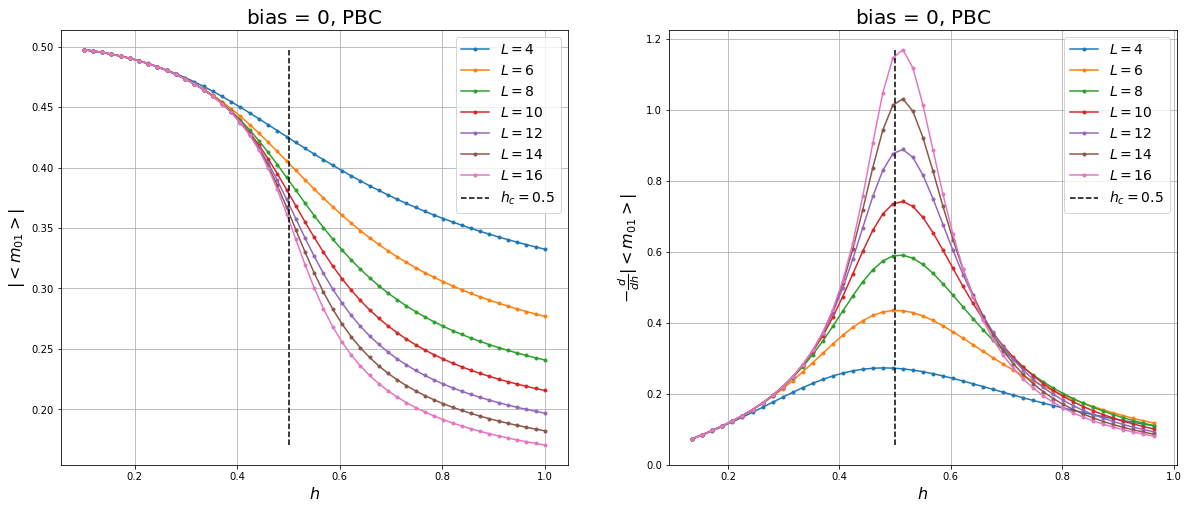

In [49]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
for iL,L in enumerate(Ls):
    x = hs
    y = np.abs(m01_s[:,iL]/L)
    plt.plot(x, y, '.-', label=r'$L={}$'.format(L))
plt.plot([hc,hc], [min(y),max(y)], 'k--', label=r'$h_c={}$'.format(hc))
plt.legend(fontsize=14)
plt.xlabel(r'$h$', fontsize=16)
plt.ylabel(r'$|<m_{01}>|$', fontsize=16)
plt.title('bias = ${}$, {}'.format(bias,bc), fontsize=20)
plt.grid()

plt.subplot(1,2,2)
for iL,L in enumerate(Ls):
    x = hs
    y = -np.gradient(np.abs(m01_s[:,iL]/L), hs)
    plt.plot(x[2:-2], y[2:-2], '.-', label=r'$L={}$'.format(L))
plt.plot([hc,hc], [min(y),max(y)], 'k--', label=r'$h_c={}$'.format(hc))
plt.legend(fontsize=14)
plt.xlabel(r'$h$', fontsize=16)
plt.ylabel(r'$-\frac{d}{dh}|<m_{01}>|$', fontsize=16)
plt.title('bias = ${}$, {}'.format(bias,bc), fontsize=20)
plt.grid()

plt.show()

Plot $\xi/L$, where $\xi \equiv \frac{1}{E_1-E_0}$

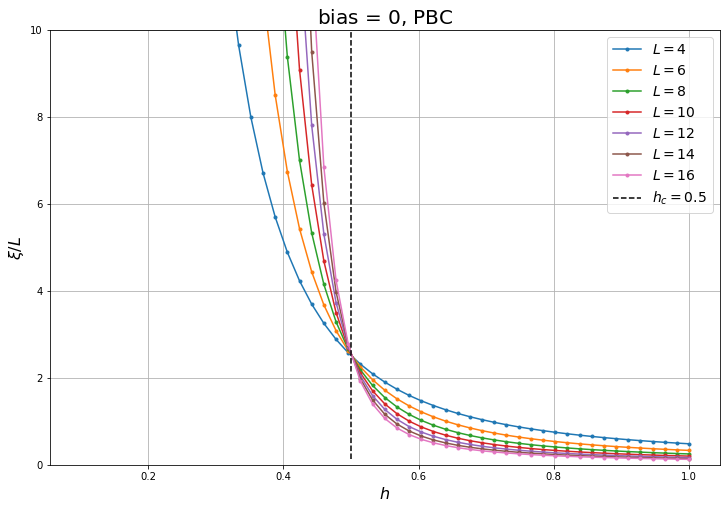

In [50]:
plt.figure(figsize=(12,8))
for iL,L in enumerate(Ls):
    E0 = Ei_s[0,:,iL]
    E1 = Ei_s[1,:,iL]
    xi_over_L = 1/(E1-E0) * 1/L
    x = hs
    y = xi_over_L
    plt.plot(x, y, '.-', label=r'$L={}$'.format(L))
plt.plot([hc,hc], [min(y),max(y)], 'k--', label=r'$h_c={}$'.format(hc))
plt.legend(fontsize=14)
plt.xlabel(r'$h$', fontsize=16)
plt.ylabel(r'$\xi/L$', fontsize=16)
plt.title('bias = ${}$, {}'.format(bias,bc), fontsize=20)
plt.grid()


ZoomIn = False
if ZoomIn:
    plt.xlim(0.48,0.52)
    plt.ylim(2,3)
else:
    # plt.yscale('log')
    plt.ylim(0,10)

## Problem 6: Exact solution

Write a function that returns the exact $E_0$ and $E_1$ for a given set of parameters. 

In [51]:
def Lambda_a(N):
    L_a = np.arange(-(N-1),(N-1+1),2)*np.pi/N
    return L_a

def Lambda_p(N):
    L_p = np.arange(-(N-2),(N-2+1),2)*np.pi/N
    L_p = np.delete(L_p, np.where(L_p == 0))
    return L_p

def exact_E0(N,h):
    L_a = Lambda_a(N)
    E_k = np.sqrt((J/2)**2 + h**2 + J*h*np.cos(L_a))
    E_0 = -1/2*np.sum(E_k)
    return E_0

def exact_E1(N,h):
    L_p = Lambda_p(N)
    E_k = np.sqrt((J/2)**2 + h**2 + J*h*np.cos(L_p))
    E_1 = -1/2*np.sum(E_k) - J/2
    return E_1

N = 6; h = 0.25
E0_exact = exact_E0(N,h)
E1_exact = exact_E1(N,h)
print('E0_exact/L = ', E0_exact)
print('E1_exact/L = ', E1_exact)

E0_exact/L =  -1.5961736409009188
E1_exact/L =  -1.594450529658367


## Problem 7: Compare to the exact solution

Set $J=1$, $N=8$, $h\in [0, 1]$ and plot $E_0/N$ and $E_1/N$ as a function of $h$. Plot both your results and exact results. Show that your results are identical to the exact results.

In [52]:
hs = np.linspace(0,1,50+1)
E0_s = np.zeros_like(hs)
E1_s = np.zeros_like(hs)
E0_exact_s = np.zeros_like(hs)
E1_exact_s = np.zeros_like(hs)

J = 1
L = 8
bc = 'PBC'

for ih,h in enumerate(hs):
    # Diagonalization
    Hx,Hz,Hxx,Hzz = all_H(L,bc)
    H_PBC = -J*Hxx - h*Hz - bias*Hx
    Y, Z = eigsh(H_PBC, k=2, which='SA')
    E0_s[ih] = Y[0]
    E1_s[ih] = Y[1]

    # Exact solution
    E0_exact_s[ih] = exact_E0(L,h)
    E1_exact_s[ih] = exact_E1(L,h)

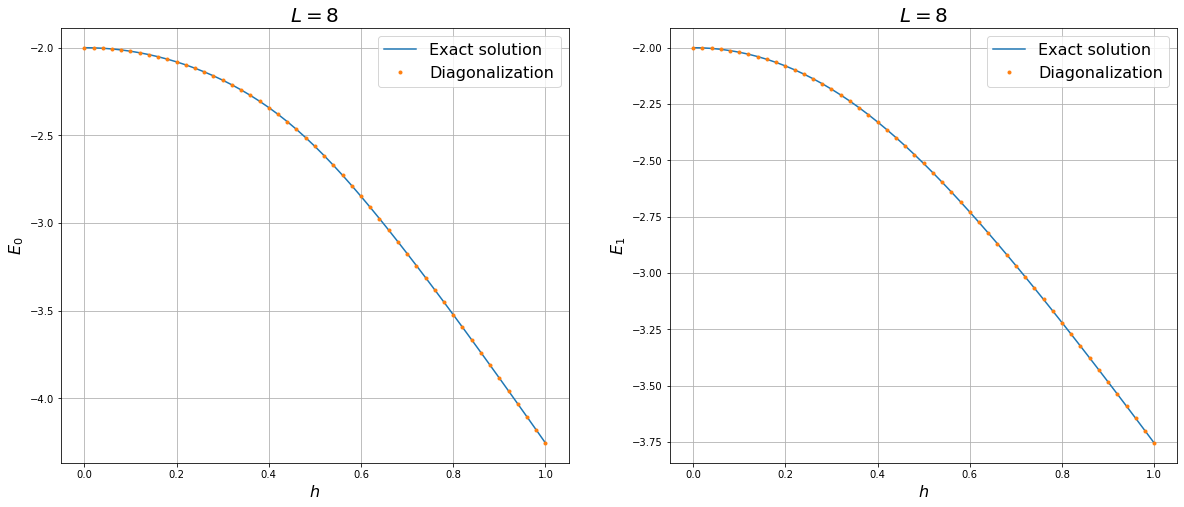

In [53]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
x = hs
y1 = E0_s
y2 = E0_exact_s
plt.plot(x,y2,'-',label='Exact solution')
plt.plot(x,y1,'.',label='Diagonalization')
plt.xlabel('$h$', fontsize=16)
plt.ylabel(r'$E_0$', fontsize=16)
plt.title('$L={}$'.format(L), fontsize=20)
plt.legend(fontsize=16)
plt.grid()

plt.subplot(1,2,2)
x = hs
y1 = E1_s
y2 = E1_exact_s
plt.plot(x,y2,'-',label='Exact solution')
plt.plot(x,y1,'.',label='Diagonalization')
plt.xlabel('$h$', fontsize=16)
plt.ylabel(r'$E_1$', fontsize=16)
plt.title('$L={}$'.format(L), fontsize=20)
plt.legend(fontsize=16)
plt.grid()

plt.show()

## Problem 8: Finite-size scaling of the gap
Set $J=1$, $N=8$, $h\in [0, 1]$ and plot the gap $\Delta \equiv E_1-E_0$ as a function of $h$. Plot both your results and exact results. Show that your results are identical to the exact results.

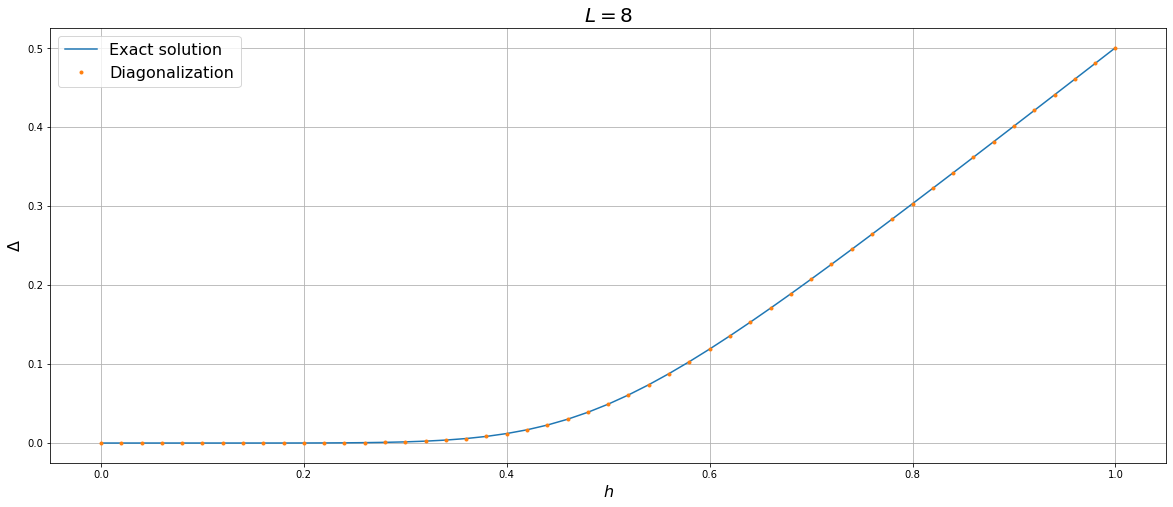

In [28]:
plt.figure(figsize=(20,8))
x = hs
y1 = E1_s - E0_s
y2 = E1_exact_s - E0_exact_s
plt.plot(x,y2,'-',label='Exact solution')
plt.plot(x,y1,'.',label='Diagonalization')
plt.xlabel('$h$', fontsize=16)
plt.ylabel(r'$\Delta$', fontsize=16)
plt.title('$L={}$'.format(L), fontsize=20)
plt.legend(fontsize=16)
plt.grid()
plt.show()